<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


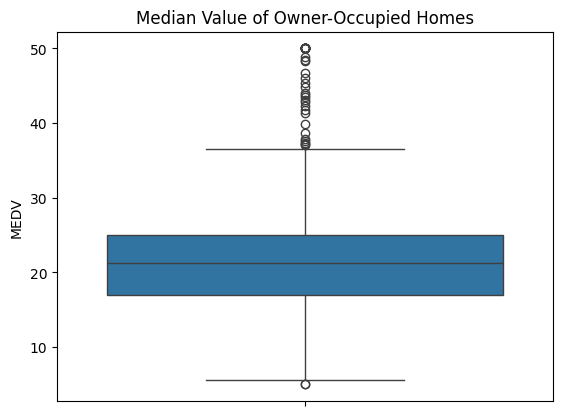

In [6]:
# 1. For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(y='MEDV',data=boston_df)
plt.title('Median Value of Owner-Occupied Homes')
plt.show()

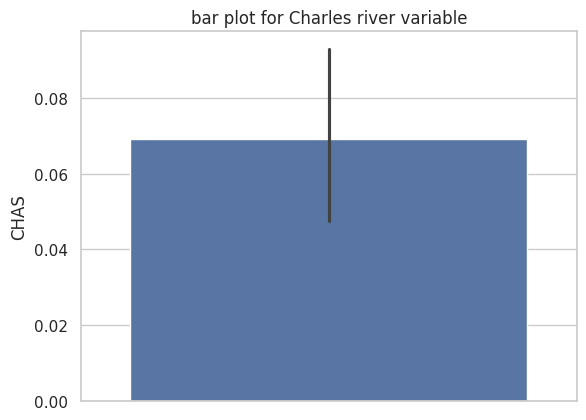

In [7]:
# 2. Provide a bar plot for the Charles river variable

sns.set(style="whitegrid")
ax=sns.barplot(y='CHAS',data=boston_df)
plt.title('bar plot for Charles river variable')
plt.show()

In [8]:
# 3.Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 and Younger'
boston_df.loc[((boston_df['AGE']>35) & (boston_df['AGE']<70)),'age_group']='between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70 and Older'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and Older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 and Older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 and Older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 and Older


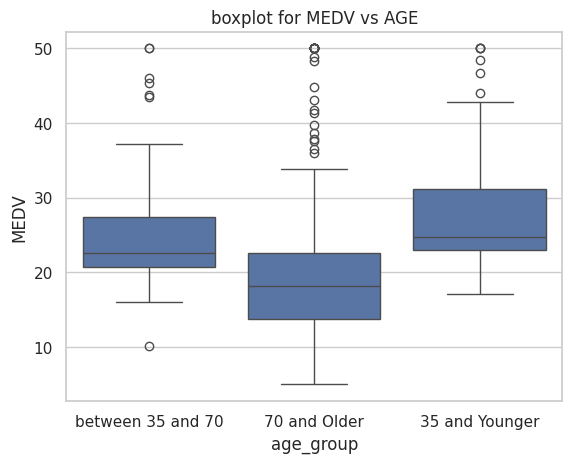

In [9]:
ax = sns.boxplot(x = 'age_group', y='MEDV', data=boston_df)
plt.title('boxplot for MEDV vs AGE')
plt.show()

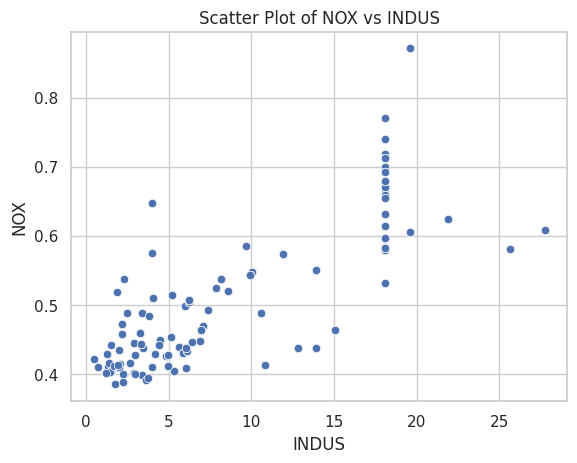

In [10]:
# 4. provide a scatter plot to show the relationship between Nitric Oxide concentrations and proportion of non-retail bussiness acres per town

ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.show()

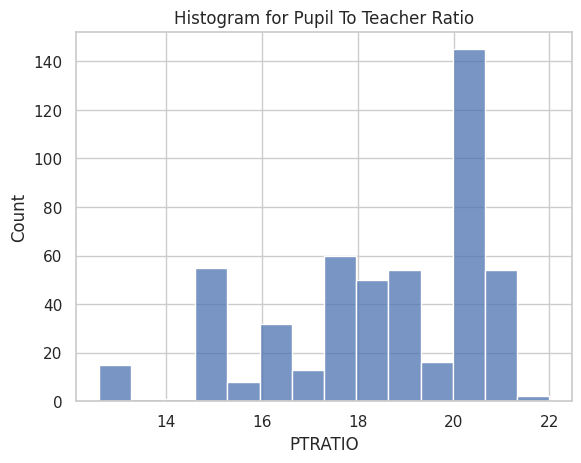

In [15]:
# 5. Create a histogram for the pupil to teacher ratio variable

ax = sns.histplot(x = 'PTRATIO', data=boston_df)
plt.title('Histogram for Pupil To Teacher Ratio')
plt.show()

Task 3:

1.Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Null Hypothesis(H0)** = There is no significant difference in median value of houses bounded by the Charles river.

**Alternate Hypothesis(H1)** = There is significant difference in median value of houses bounded by the Charles river.

alpha = 0.05

In [16]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                  boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [17]:
# Since the p-value if less than 0.05 equal_var=False

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                     boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:**
Since the value of p is less than alpha value 0.05 we reject the null hypothesis.
Hence there is a significant difference in median value of houses bounded by the Charles river

2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
The age is already discritized and is stored under the feature/column name age_group



**Null Hypothesis(H0):** µ\_1=µ\_2=µ\_3 (the three age groups are equal)
**Alternate Hypothesis(H1)** = Atleast one will differ

alpha = 0.05

In [18]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and Younger']['MEDV'],
                  boston_df[boston_df['age_group']=='between 35 and 70']['MEDV'],
                  boston_df[boston_df['age_group']=='70 and Older']['MEDV'], 
                  center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [19]:
thirtyfive_lower_medv=boston_df[boston_df['age_group'] == '35 and Younger']['MEDV']
thirtyfive_seventy_medv=boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_older_medv=boston_df[boston_df['age_group']=='70 and Older']['MEDV']

In [20]:
f_statistic,p_value=scipy.stats.f_oneway(thirtyfive_lower_medv,thirtyfive_seventy_medv,seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that aleast one will differ.

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Null Hypothesis(H0):** Nitric Oxide concentrations are not correlated with proportion of non-retail bussiness acres per town.

**Alternate Hypothesis(H1):** Nitic Oxide concentrations are correlated with proportion of non-retail bussiness acres per town.

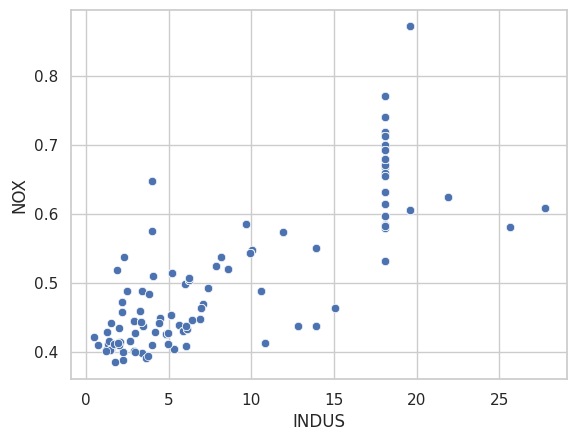

In [21]:
ax=sns.scatterplot(x = 'INDUS', y = 'NOX', data=boston_df)

In [22]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value > 0.05 we fail to reject the Null hypothesis as there is no sufficient evidence that Nitrous Oxide Concentrations are correlated with proportions of non-retail bussiness acres per town

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Null Hypothesis (H0):**(additional DIS has no impact on MEDV)
**Alternate Hypothesis(H1):**(additional DIS has impact on MEDV)

In [24]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        00:20:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than alpha level = 0.05 so we reject the null hypothesis